In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def hat_game(T, debug=False):
    start_size = len(T)
    while len(T) > 1:
        # Pick two random elements
        a, b = np.random.choice(T, 2, replace=False)
        T.remove(a)
        T.remove(b)
        new_value = abs(a - b)
        # Replace with their difference
        T.append(new_value)
        
        if debug:
            print(f'Turn {start_size - len(T)}')
            print(f"Removed: {a}, {b} -> Adding: {new_value}")
            print(f"Current hat: {T}")
    
    # Return the final remaining number
    return T[0]

def get_numbers(T, trials, debug=False):
    numbers = []
    for _ in range(trials):
        num = hat_game(list(T), debug)
        if num not in numbers:
            numbers.append(num)
    return sorted(numbers)

n = 10
num_trials = 100

T = list(range(1, n + 1))
numbers = get_numbers(T, num_trials)

# Display results
print(f'n = {n}')
print(f'# trials = {num_trials}')
print(f'Set S_{n} = {T}')
print(f'Outcomes K_{n} = {numbers}')

n = 10
# trials = 100
Set S_10 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Outcomes K_10 = [1, 3, 5, 7, 9]


In [2]:
# Print n and odd/even to spot patterns
num_trials = 100
for n in range(2, 51):
    T = np.array(range(1, n + 1))
    numbers = get_numbers(T, trials=num_trials, debug=False)
    print(f'{n} {numbers[0]}')

2 1
3 0
4 0
5 1
6 1
7 0
8 0
9 1
10 1
11 0
12 0
13 1
14 1
15 0
16 0
17 1
18 1
19 0
20 0
21 1
22 1
23 0
24 0
25 1
26 1
27 0
28 0
29 1
30 1
31 0
32 0
33 1
34 1
35 0
36 0
37 1
38 1
39 0
40 0
41 1
42 1
43 0
44 0
45 1
46 1
47 0
48 0
49 1
50 1


n = 100
# trials = 10000
Set S_100 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Frequencies = {24: 366, 34: 240, 20: 403, 2: 692, 6: 613, 32: 267, 10: 590, 48: 132, 60: 57, 44: 152, 4: 690, 16: 436, 38: 212, 12: 487, 54: 89, 8: 615, 52: 84, 14: 492, 22: 361, 28: 308, 68: 36, 26: 340, 18: 434, 30: 273, 46: 160, 80: 14, 56: 77, 40: 180, 42: 146, 58: 66, 36: 215, 0: 368, 50: 114, 84: 5, 66: 42, 62: 60, 74: 25, 76: 24, 82: 11, 72: 37, 64: 31, 70: 22, 92: 3, 90: 5, 96: 3, 78: 12, 86: 5, 88: 4, 100: 1, 98: 1}
Mean = 21.3426
Variance = 305.53062523999995


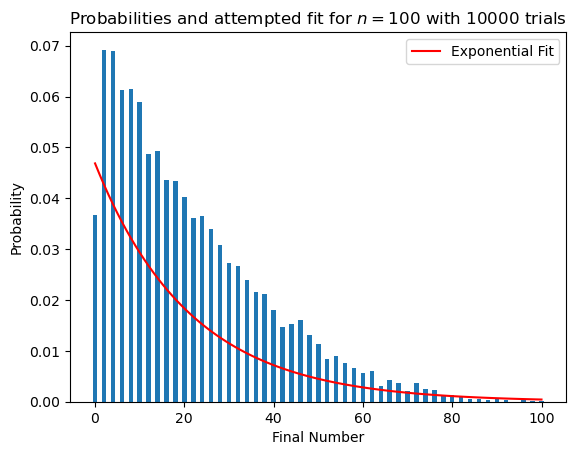

In [3]:
# Extract frequencies for extension
def get_frequencies(T, trials, debug=False):
    freqs = {}
    for _ in range(trials):
        num = hat_game(list(T), debug)
        freqs[num] = freqs.get(num, 0) + 1
    
    return freqs

n = 100
num_trials = 10000

T = list(range(1, n + 1))

# Display results
print(f'n = {n}')
print(f'# trials = {num_trials}')
print(f'Set S_{n} = {T}')
freqs = get_frequencies(T, num_trials)
print(f'Frequencies = {freqs}')

# Create data array containing repeats by frequency
data = np.repeat(list(freqs.keys()), list(freqs.values()))
# print(data)
mean = np.mean(data)
var = np.var(data)
print(f'Mean = {mean}')
print(f'Variance = {var}')

plt.hist(data, bins=np.arange(min(data), max(data) + 2) - 0.5, density=True)
plt.xlabel('Final Number')
plt.ylabel('Probability')
# plt.xticks(np.arange(min(data), max(data) + 1))
x = np.linspace(min(data), max(data), 100)
params = stats.expon.fit(data)  # Fit an exponential distribution
y = stats.expon.pdf(x, *params)

plt.plot(x, y, label="Exponential Fit", color="red")
plt.legend()
plt.title(f'Probabilities and attempted fit for $n={n}$ with {num_trials} trials')
plt.show()